# Day 12 : Hill Climbing Algorithm  
--------
This is my solution of [day 12](https://adventofcode.com/2022/day/12).

In [154]:
### Import function and Data
%run get_script.py 
from Script import input_as_lines
import numpy as np

print(f"input_as_lines\n{input_as_lines.__doc__}")
data = input_as_lines("Day_12.txt")

input_as_lines
Return a list where each line in the input file is an element of the list


## Part One

In [155]:
data

['abcccccccaaaaaaaaccccccccccaaaaaaccccccaccaaaaaaaccccccaacccccccccaaaaaaaaaaccccccccccccccccccccccccccccccccaaaaa',
 'abcccccccaaaaaaaaacccccccccaaaaaacccccaaacaaaaaaaaaaaccaacccccccccccaaaaaaccccccccccccccccccccccccccccccccccaaaaa',
 'abcccccccaaaaaaaaaaccccccccaaaaaacaaacaaaaaaaaaaaaaaaaaaccccccccccccaaaaaaccccccccccccccaaacccccccccccccccccaaaaa',
 'abaaacccccccaaaaaaacccccccccaaacccaaaaaaaaaaaaaaaaaaaaaaaaacccccccccaaaaaaccccccccccccccaaacccccccccccccccccaaaaa',
 'abaaaaccccccaaaccccccccccccccccccccaaaaaaaaacaaaacacaaaaaacccccccccaaaaaaaacccccccccccccaaaaccaaacccccccccccaccaa',
 'abaaaaccccccaaccccaaccccccccccccccccaaaaaaacaaaaccccaaaaaccccccccccccccccacccccccccccccccaaaaaaaaacccccccccccccca',
 'abaaaaccccccccccccaaaacccccccccaacaaaaaaaacccaaacccaaacaacccccccccccccccccccccccccccciiiiaaaaaaaacccccccccccccccc',
 'abaaacccccccccccaaaaaacccccccccaaaaaaaaaaacccaaacccccccaacccccccccccaacccccccccccccciiiiiiijaaaaccccccccaaccccccc',
 'abaaaccccccccccccaaaacccccccccaaaaaaaacaaacccaaacccccc

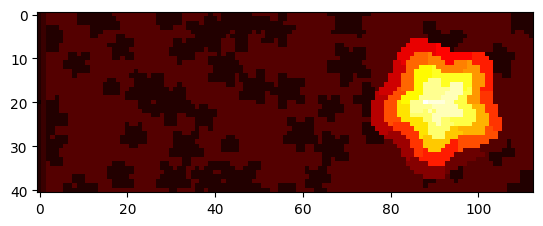

In [156]:
def transform_letters(s):
    values = []
    for ch in s:
        if ch == "S":
            values.append(0)
        elif ch == "E":
            values.append(27)
        else:
            values.append(
                ord(ch) - ord('a') + 1
            )
    return values

heightmap  = np.array([transform_letters(s) for s in data])
#heightmap  = np.pad(heightmap , pad_width=1, constant_values=1000)
heightmap

import matplotlib.pyplot as plt
plt.imshow(heightmap,  cmap='hot')    

In [157]:
def find_extrema(M):
    indices_start = np.where(M == 0)
    row_index_start, col_index_start = indices_start[0][0], indices_start[1][0]

    indices_end = np.where(M == 27)
    row_index_end, col_index_end = indices_end[0][0], indices_end[1][0]
    
    return (row_index_start, col_index_start, row_index_end, col_index_end)

row_index_start, col_index_start, row_index_end, col_index_end = find_extrema(heightmap)

print(heightmap[(row_index_start, col_index_start)])
print(heightmap[(row_index_end, col_index_end)])

0
27


### Dijkstra

In [158]:
import heapq
from itertools import product

class Graph:
    def __init__(self):
        # Initialize an empty adjacency list and a dictionary to map coordinates to vertices
        self.adjacency_list = []
        self.coord_to_vertex = {}

    def add_node(self, coord:tuple):
        # Add a new node to the graph and map the coordinates to the vertex
        vertex = len(self.adjacency_list)
        self.adjacency_list.append([])
        self.coord_to_vertex[coord] = vertex

    def get_coord_from_node(self, node:int):
        return list(self.coord_to_vertex.keys())[node]

    def add_edge(self, u:tuple, v:tuple):
        # Add an directed edge from u to v with weight 1
        # u and v are Coordinates. .

        vertex_u = self.coord_to_vertex[u]
        vertex_v = self.coord_to_vertex[v]

        if (v, 1) not in self.adjacency_list[vertex_u]:
            self.adjacency_list[vertex_u].append((v, 1))

    def dijkstra(self, source_coord:tuple, target_coord:tuple):
        # Map the source and target coordinates to vertices
        source = self.coord_to_vertex[source_coord]
        target = self.coord_to_vertex[target_coord]

        # Initialize the distances to all vertices as infinity and the source vertex as zero
        distances = [np.inf] * len(self.adjacency_list)
        distances[source] = 0

        # Initialize a priority queue and put the source vertex in it
        pq = []
        heapq.heappush(pq, (0, source))

        # While the priority queue is not empty
        while pq:
            # Extract the vertex with the smallest distance from the queue
            _, u = heapq.heappop(pq)

            # If the extracted vertex is the target vertex, we are done
            if u == target:
                break

            # Iterate through the neighbors of the vertex
            for v, w in self.adjacency_list[u]:
                # Calculate the distance to the neighbor through the current vertex
                alt = distances[u] + w
                # If the new distance is smaller than the current distance of the neighbor
                if alt < distances[self.coord_to_vertex[v]]:
                    # Update the distance of the neighbor
                    distances[self.coord_to_vertex[v]] = alt
                    # Add the neighbor to the priority queue
                    heapq.heappush(pq, (alt, self.coord_to_vertex[v]))

        # Return the shortest distance from the source to the target
        return distances[target]

def neighborhood(M, i,j):
    neighbor = []
    if i-1>=0:
        neighbor.append((i-1,j))
    if i+1<M.shape[0]:
        neighbor.append((i+1,j))
    
    if j-1>=0:
        neighbor.append((i,j-1))
    if j+1<M.shape[1]:
        neighbor.append((i,j+1))
    return neighbor

# Create the graph
heightgraph = Graph()
for (i,j) in product(range(heightmap.shape[0]), range(heightmap.shape[1])):
    heightgraph.add_node((i,j))
for (i,j) in product(range(heightmap.shape[0]), range(heightmap.shape[1])):
    for l,k in neighborhood(heightmap, i,j):
        if heightmap[(l,k)] <= heightmap[(i,j)] + 1:
            heightgraph.add_edge((i,j), (l,k))

In [159]:
heightgraph.dijkstra((row_index_start, col_index_start), (row_index_end, col_index_end))

380

## Part Two

In [160]:
indices = np.where(heightmap == 1)
path = []
for (x,y) in zip(indices[0], indices[1]):
    path.append(
        heightgraph.dijkstra((x, y), (row_index_end, col_index_end))
        )

print(min(path))

375


--------
<small>Solution can be found [here]()